Maya Asher, 4/26/24
# Analyzing the SBCSAE
**NEW CONTINUING**

Using the processed data (which can be found [here](https://github.com/Data-Science-for-Linguists-2024/Stance-Taking-in-Spontaneous-Speech/blob/main/reprocessing_sbcsae.ipynb)) we can begin our stance taking anaylsis.

## Object of analysis
**TL;DR**: This analysis will focus on lexical items and discourse markers that vary in their levels of investment (ex: *like* vs. *love*). This is based on a three dimensional model of analyzing stance and stanctaking explained in Kiesling (2022).
### Background
As Dr. Scott Kiesling discusses in his paper "Stance and Stancetaking" (2022), stance is how people position themselves in conversations and it can be analyzed using a three-dimensional model that encompasses **evaluation**, **alignment**, and **investment**. In a simple conversation, animator A evaluates an object, prompting animator B to also evaluate that object, resulting in an alignment or disalignment between the two interlocutors. Investment is the extent to which each person commits to their evaluation. 

So, for example, if I were to say "I really love data science," I am indexing a large amount of investment to my evaluation of data science. Then, if my interlocutor were to respond, "I kind of like data science," we are somewhat aligning by speaking of data science in a positive light, but they are indexing less investment in their evaluation than I am. 

In the example above, investment was indexed through the lexical items *really love* and *kind of like*, but an animator's level of investment can also be indicated through epistemicity and evidentiality.

In this three-dimensional model of analysis, there are also three participant roles: the **author** who composes the essential text, the **animator** who produces the speech, and the **principal** who takes responsibility for the utterance. This idea will be explored later on in the analysis.
### Current investigation
With the idea of investment established, my focus for this project will be to identify lexical items that index varying levels of investment and analyze their contexts and frequencies, producing both qualitative and quantitative results that can be compared to one another. 

Specifically, I will look at lexical items and discourse markers that vary in thier predicted levels of investment (`like`, `love`, `fine`, `good`, `great`, `I mean`, `might`, `always`, `maybe`, and `very`). To do this, we will unpickle our dictionaries of data frames and begin our search for our target words.

### Citation
Kiesling, S. F. (2022). Stance and Stancetaking. *Annual Review of Linguistics*, 8, 409-426. https://doi.org/10.1146/annurev-linguistics-031120-121256

## Import

In [1]:
import pickle
import matplotlib.pyplot as plt
import re
%pprint

Pretty printing has been turned OFF


## Unpickle

In [2]:
f = open('../all_dfs.pkl', 'rb')
dfs = pickle.load(f)
f.close()

In [3]:
# perfect!
len(dfs)

43

## Investigate text
Since we labeled each dictionary's df columns the same (at least for `text`), we can use the dictionary that has ALL of the dfs!

In [4]:
dfs["SBC014.trn"].head() # 2 col

,time_speaker,text
0,0.00 2.53 FRED:,... Okay.
1,2.53 4.73,"One= large loan (Hx),"
2,4.73 6.23,"... renewed (Hx),"
3,6.23 8.08,"... a hundred ninety-seven= .. thousand,"
4,8.08 9.23,a hundred eighty dollars.


In [5]:
dfs["SBC013.trn"].head() # 3 col

,time,speaker,text
0,0.00 1.24,KEVIN:,Is that just [carbonated water]?
1,0.45 1.24,WENDY:,[No thank you].
2,1.24 1.50,,"[2No,"
3,1.24 3.38,KEN:,[2(H) No this is2] crea=m [3soda.
4,1.50 2.36,WENDY:,It's cream soda2].


In [6]:
dfs["SBC015.trn"].head() # 4 col

,time_start,time_end,speaker,text
0,2.660,2.805,JOANNE:,"But,"
1,2.805,4.685,,so these slides <X should X> be real interesting.
2,6.140,6.325,KEN:,... Yeah.
3,6.325,7.710,,I think it'll be real interesting
4,7.710,8.535,,"I think it'll be a real,"


## Extract targets
The two *lexical items* we want are `like` and `love` and the eight *discourse markers* we want are `fine`, `good`, `great`, `I mean`, `might`, `always`, `maybe`, and `very`. 


We will create a dictionary for each word with the key being the file name (ex: `SBC001.trn`) and the value being a list of tuples that look like (row number, 'like' in context). Thankfully, we can work with `dfs` because all the `text` columns are labeled as such.

In [7]:
# master dictionary
dicts = {
    'likes': {}, 'loves': {}, 'fines': {}, 'goods': {}, 'greats': {},
    'imeans': {}, 'mights': {}, 'always': {}, 'maybes': {}, 'verys': {}
}

# corresponding regexs
terms = {
    'likes': r'\blike[^,]\b', 'loves': r'\blove\b', 'fines': r'\bfine\b',
    'goods': r'\bgood\b', 'greats': r'\bgreat\b', 'imeans': r'\bI\smean\b',
    'mights': r'\bmight\b', 'always': r'\balways\b', 'maybes': r'\bmaybe\b',
    'verys': r'\bvery\b'
}

# initialize term counter
total_counts = {key: 0 for key in terms}

# process each df in `dfs`
for df_name, df in dfs.items():
    
    for key, regex in terms.items():
        
        # extract rows where the target word is found in the text column
        rows = df[df['text'].str.contains(regex, case=False, regex=True, na=False)]
        
        # list of tuples containing (row #, text) for each occurrence
        occurrences = [(index, row['text']) for index, row in rows.iterrows()]
        
        # save occurrences in the corresponding dict
        dicts[key][df_name] = occurrences
        
        # update total counts
        total_counts[key] += len(occurrences)
        
# print total counts for each term
running = 0
for term, count in total_counts.items():
    print(f"Total occurrences of '{term}':", count)
    running += count
print("Total occurences:", running)

Total occurrences of 'likes': 1188
Total occurrences of 'loves': 68
Total occurrences of 'fines': 63
Total occurrences of 'goods': 390
Total occurrences of 'greats': 115
Total occurrences of 'imeans': 432
Total occurrences of 'mights': 93
Total occurrences of 'always': 159
Total occurrences of 'maybes': 182
Total occurrences of 'verys': 187
Total occurences: 2877


In [8]:
# initialize dicts and transfer data from master dictionary
likes = {}
likes = dicts['likes']

loves = {}
loves = dicts['loves']

fines = {}
fines = dicts['fines']

goods = {}
goods = dicts['goods']

greats = {}
greats = dicts['greats']

imeans = {}
imeans = dicts['imeans']

mights = {}
mights = dicts['mights']

always = {}
always = dicts['always']

maybes = {}
maybes = dicts['maybes']

verys = {}
verys = dicts['verys']

## Pipeline for outputs

In [9]:
targets = [likes, loves, fines, goods, greats, imeans, mights, always, maybes, verys]
targets_str = ['likes', 'loves', 'fines', 'goods', 'greats', 'imeans', 'mights', 'always', 'maybes', 'verys']
count = 0

for target in targets:
    # establish indices
    indices = {key: [tpl[0] for tpl in value] for key, value in target.items()}
    
    # write out file
    with open(targets_str[count]+"_output.txt", 'w') as file:
    
        import sys
        sys.stdout = file
        
        for index in indices:
            df = dfs[index]
            print(index)
            key = index
            values = indices[key]
            # give 20 lines of context
            for v in values:
                first = v - 10
                last = v + 10
                print(df.iloc[first:last])
    count+=1
            
    sys.stdout = sys.__stdout__

## Figures and Plots

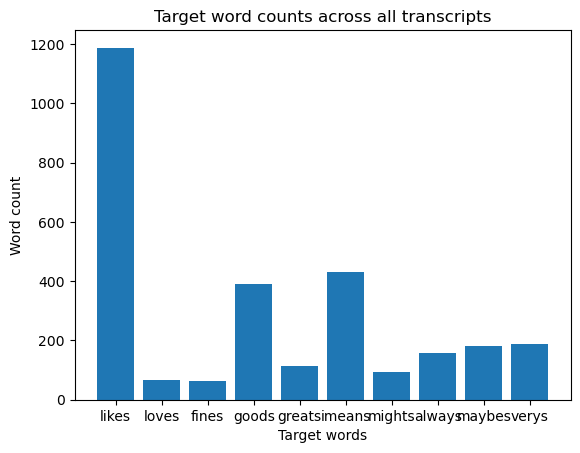

In [10]:
fig, ax = plt.subplots()

keys = list(total_counts.keys())
values = list(total_counts.values())

ax.bar(keys, values)
plt.xlabel('Target words')
plt.ylabel('Word count')
plt.title('Target word counts across all transcripts')

plt.show()